In [1]:
import numpy as np
import edf
from time import time
import sys
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
traindata = './mnist_data/train.npz'
valdata = './mnist_data/test.npz'

tdata = np.load(traindata)
t_imgs = np.float32(tdata['imgs'])/255.
t_labels = np.float32(tdata['labels'])

vdata = np.load(valdata)
v_imgs = np.float32(vdata['imgs'])/255.
v_labels = np.float32(vdata['labels'])

# A

In [3]:
def etastar(B):
    return 0.0056*float(B)+0.0659

Batch size: 50, eta: 0.37
Random accuracy = 0.1329
Epoch 0: train loss = 0.1200 [23.4000 secs]
test accuracy=0.96700
Epoch 1: train loss = 0.0702 [20.2850 secs]
test accuracy=0.97870
Epoch 2: train loss = 0.0574 [21.6250 secs]
test accuracy=0.98450
Epoch 3: train loss = 0.0441 [22.2760 secs]
test accuracy=0.98700
Epoch 4: train loss = 0.0343 [22.4200 secs]
test accuracy=0.98890
Epoch 5: train loss = 0.0300 [21.2070 secs]
test accuracy=0.99100
Epoch 6: train loss = 0.0203 [26.1910 secs]
test accuracy=0.99400
Epoch 7: train loss = 0.0190 [20.8140 secs]
test accuracy=0.99380
Epoch 8: train loss = 0.0130 [21.0550 secs]
test accuracy=0.99610
Epoch 9: train loss = 0.0082 [23.2570 secs]
test accuracy=0.99800


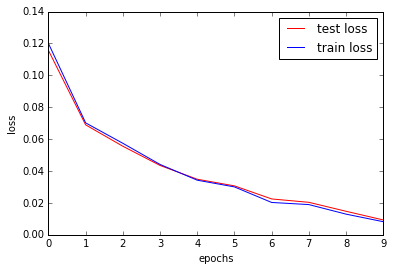

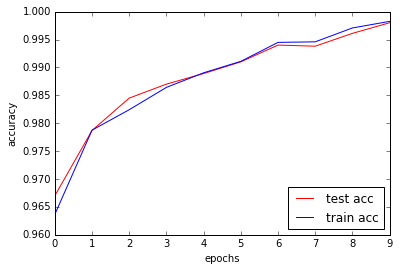

Batch size: 10, eta: 0.1219
Random accuracy = 0.1498
Epoch 0: train loss = 0.0999 [106.8820 secs]
test accuracy=0.97210
Epoch 1: train loss = 0.0699 [107.9510 secs]
test accuracy=0.97960
Epoch 2: train loss = 0.0556 [109.5590 secs]
test accuracy=0.98280
Epoch 3: train loss = 0.0336 [131.0630 secs]
test accuracy=0.98980
Epoch 4: train loss = 0.0366 [137.1210 secs]
test accuracy=0.98720
Epoch 5: train loss = 0.0264 [136.1060 secs]
test accuracy=0.99130
Epoch 6: train loss = 0.0245 [138.6920 secs]
test accuracy=0.99210
Epoch 7: train loss = 0.0185 [136.0380 secs]
test accuracy=0.99350
Epoch 8: train loss = 0.0141 [133.3820 secs]
test accuracy=0.99500
Epoch 9: train loss = 0.0117 [131.4050 secs]
test accuracy=0.99540


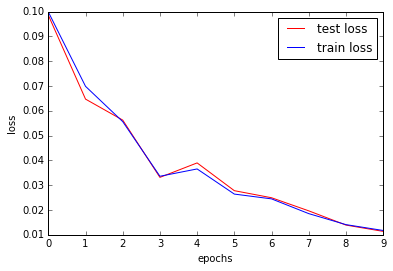

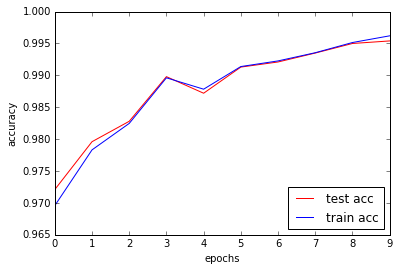

Batch size: 10, eta: 0.37
Random accuracy = 0.1110
Epoch 0: train loss = 0.1918 [137.2760 secs]
test accuracy=0.94710
Epoch 1: train loss = 0.1709 [137.0180 secs]
test accuracy=0.95440
Epoch 2: train loss = 0.1291 [137.1930 secs]
test accuracy=0.96660
Epoch 3: train loss = 0.1369 [138.1290 secs]
test accuracy=0.96510
Epoch 4: train loss = 0.1153 [142.6120 secs]
test accuracy=0.97140
Epoch 5: train loss = 0.1330 [136.7780 secs]
test accuracy=0.96810
Epoch 6: train loss = 0.0831 [110.3420 secs]
test accuracy=0.97780
Epoch 7: train loss = 0.0901 [109.3920 secs]
test accuracy=0.97800
Epoch 8: train loss = 0.1541 [109.0740 secs]
test accuracy=0.96850
Epoch 9: train loss = 0.1546 [109.4340 secs]
test accuracy=0.97260


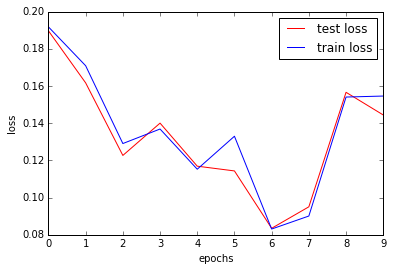

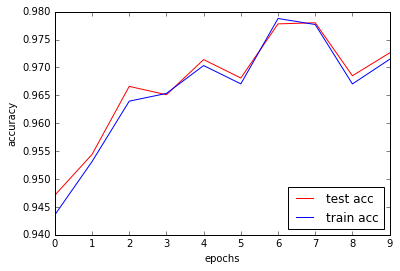

Batch size: 100, eta: 0.6259
Random accuracy = 0.1019
Epoch 0: train loss = 0.1311 [12.0320 secs]
test accuracy=0.96070
Epoch 1: train loss = 0.0808 [11.9080 secs]
test accuracy=0.97780
Epoch 2: train loss = 0.0726 [11.7580 secs]
test accuracy=0.97670
Epoch 3: train loss = 0.0455 [11.7790 secs]
test accuracy=0.98620
Epoch 4: train loss = 0.0341 [11.8680 secs]
test accuracy=0.98960
Epoch 5: train loss = 0.0339 [11.8340 secs]
test accuracy=0.99000
Epoch 6: train loss = 0.0246 [11.8160 secs]
test accuracy=0.99300
Epoch 7: train loss = 0.0220 [11.7420 secs]
test accuracy=0.99420
Epoch 8: train loss = 0.0145 [11.8030 secs]
test accuracy=0.99660
Epoch 9: train loss = 0.0148 [11.9750 secs]
test accuracy=0.99630


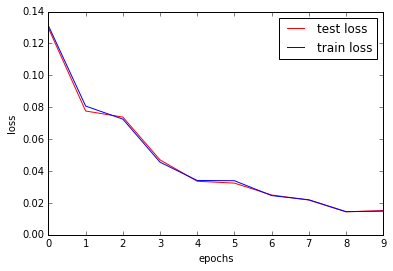

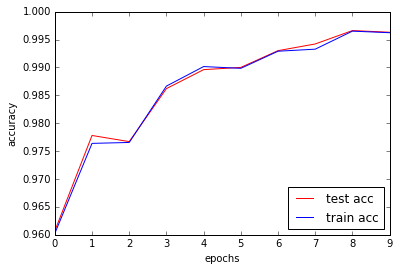

Batch size: 100, eta: 0.37
Random accuracy = 0.1153
Epoch 0: train loss = 0.1582 [12.7290 secs]
test accuracy=0.95710
Epoch 1: train loss = 0.1051 [12.7610 secs]
test accuracy=0.97290
Epoch 2: train loss = 0.0745 [12.7110 secs]
test accuracy=0.97830
Epoch 3: train loss = 0.0595 [12.7540 secs]
test accuracy=0.98510
Epoch 4: train loss = 0.0469 [12.8210 secs]
test accuracy=0.98680
Epoch 5: train loss = 0.0444 [12.9400 secs]
test accuracy=0.98750
Epoch 6: train loss = 0.0376 [13.0830 secs]
test accuracy=0.98900
Epoch 7: train loss = 0.0358 [13.0810 secs]
test accuracy=0.98950
Epoch 8: train loss = 0.0280 [13.2520 secs]
test accuracy=0.99240
Epoch 9: train loss = 0.0213 [12.8020 secs]
test accuracy=0.99480


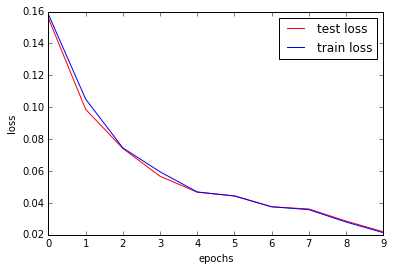

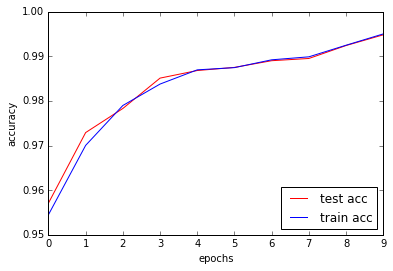

In [29]:
############################# Demonstration that SGD works for min-batch setting ############################## 


######################################### please modify this cell to finish the problem 2.a #######################
# for repeatability
np.random.seed(0)
# Set the loops
B = [50,10,10,100,100]
etas = [0.37,etastar(10),0.37,etastar(100),0.37]

for i in range(5):
    # Inputs and parameters
    inp = edf.Value()
    lab = edf.Value()

    W1 = edf.Param(edf.xavier((28*28,128)))
    B1 = edf.Param(np.zeros((128)))
    W2 = edf.Param(edf.xavier((128,10)))
    B2 = edf.Param(np.zeros((10)))

    # models
    hidden = edf.RELU(edf.Add(edf.VDot(inp,W1),B1))
    pred = edf.SoftMax(edf.Add(edf.VDot(hidden,W2),B2))
    loss = edf.LogLoss(edf.Aref(pred, lab))
    acc = edf.Accuracy(pred,lab)

    print("Batch size: " + str(B[i])+", eta: "+str(etas[i]))
    # batch size, please try 10, 50 and 100. For each run, you might need to reloading the kernel (edf.py) 
    # to clear the history information
    batch = B[i]
    # learning rate eta, measured by per-batch unit. If you change this batch size, you might also change eta 
    # accoridng to the equation given in the homework.
    eta = etas[i]

    # evaluate the random performance
    def eval(imgs, labels):

        batches = range(0, len(labels), batch)
        objective = 0
        accuracy = 0
        for k in batches:
            inp.set(t_imgs[k:k+batch])
            lab.set(t_labels[k:k+batch])
            edf.Forward()
            objective += np.mean(loss.value)
            accuracy += acc.value

        return accuracy/len(batches), objective/len(batches)

    #RESET RANDOM ACCURACY
    t_imgs = np.float32(tdata['imgs'])/255.
    t_labels = np.float32(tdata['labels'])

    v_imgs = np.float32(vdata['imgs'])/255.
    v_labels = np.float32(vdata['labels'])
    
    accuracy, objective = eval(t_imgs, t_labels)
    print("Random accuracy = %.4f" % accuracy)

    # train loop
    train_loss = []
    train_acc = []
    test_loss = []
    test_acc = []
    ep = 0
    stime = time()
    epoch = 10
    batches = range(0, len(t_labels), batch)

    while ep < epoch:

        # randon shuffle the train data in each epoch
        perm = np.random.permutation(len(t_labels))
        for k in batches:    
            inp.set(t_imgs[perm[k:k+batch]])
            lab.set(t_labels[perm[k:k+batch]])
            edf.Forward()
            edf.Backward(loss)
            edf.SGD(eta)

        # evaluate on trainset
        t_acc, t_loss = eval(t_imgs, t_labels)
        print("Epoch %d: train loss = %.4f [%.4f secs]" % (ep, t_loss,time()-stime))
        train_loss.append(t_loss)
        train_acc.append(t_acc)

        # evaluate on testset
        v_acc, v_loss = eval(v_imgs, v_labels)
        print("test accuracy=%.5f" % v_acc)
        test_loss.append(v_loss)
        test_acc.append(v_acc)
        stime = time()
        ep += 1

    # plot
    plt.figure(1)
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.plot(np.arange(len(test_loss)), test_loss, color='red')
    plt.plot(np.arange(len(train_loss)), train_loss, color='blue')
    plt.legend(['test loss', 'train loss'], loc='upper right')
    plt.show()

    plt.figure(2)
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.plot(np.arange(len(test_acc)), test_acc, color='red')
    plt.plot(np.arange(len(train_acc)), train_acc, color='blue')
    plt.legend(['test acc', 'train acc'], loc='lower right')
    plt.show()

The four training losses are as follows: 


B = 10 and $\eta$ = 0.1219, train loss = 0.0144

B = 10 and $\eta$ = 0.37, train loss = 0.0832

B = 100 and $\eta$ = 0.6259, train loss = 0.0132

B = 100 and $\eta$ = 0.37, train loss = 0.0210

It's clear, that using the eta forumla out performs a value of 0.37 for the batches, and that the larger batch of 100 slightly ourperforms the batch of 10.

# B

Batch size: 50, eta: 0.37
Random accuracy = 0.1329
Epoch 0: train loss = 0.1168 [12.502 secs]
test accuracy=0.9678
Epoch 1: train loss = 0.0716 [13.048 secs]
test accuracy=0.9775
Epoch 2: train loss = 0.0572 [14.122 secs]
test accuracy=0.9837
Epoch 3: train loss = 0.0438 [14.583 secs]
test accuracy=0.9873
Epoch 4: train loss = 0.0359 [14.441 secs]
test accuracy=0.9883
Epoch 5: train loss = 0.0371 [14.518 secs]
test accuracy=0.9894
Epoch 6: train loss = 0.0252 [14.689 secs]
test accuracy=0.9915
Epoch 7: train loss = 0.0155 [12.856 secs]
test accuracy=0.9955
Epoch 8: train loss = 0.0130 [12.899 secs]
test accuracy=0.9961
Epoch 9: train loss = 0.0102 [14.384 secs]
test accuracy=0.9969


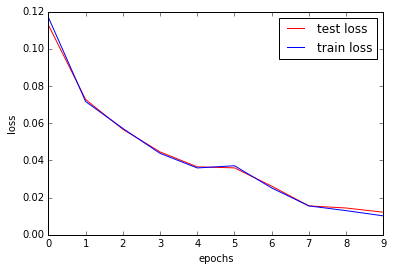

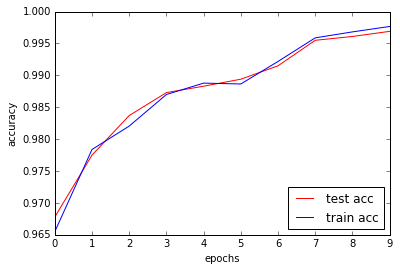

Batch size: 10, eta: 0.1219
Random accuracy = 0.1498
Epoch 0: train loss = 0.0949 [90.905 secs]
test accuracy=0.9729
Epoch 1: train loss = 0.0780 [85.165 secs]
test accuracy=0.9786
Epoch 2: train loss = 0.0488 [86.713 secs]
test accuracy=0.9852
Epoch 3: train loss = 0.0440 [88.441 secs]
test accuracy=0.9861
Epoch 4: train loss = 0.0282 [83.214 secs]
test accuracy=0.9907
Epoch 5: train loss = 0.0263 [82.669 secs]
test accuracy=0.9908
Epoch 6: train loss = 0.0204 [84.766 secs]
test accuracy=0.9936
Epoch 7: train loss = 0.0142 [82.759 secs]
test accuracy=0.9952
Epoch 8: train loss = 0.0148 [84.706 secs]
test accuracy=0.9954
Epoch 9: train loss = 0.0155 [85.945 secs]
test accuracy=0.9951


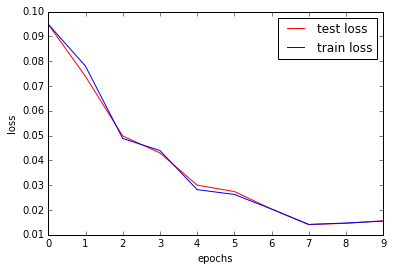

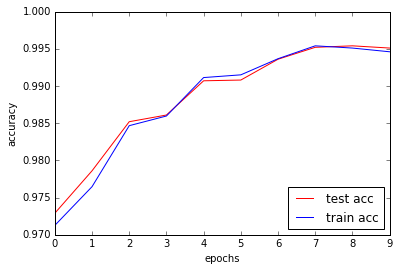

Batch size: 10, eta: 0.37
Random accuracy = 0.1110
Epoch 0: train loss = 0.1854 [102.602 secs]
test accuracy=0.9434
Epoch 1: train loss = 0.1471 [102.465 secs]
test accuracy=0.9571
Epoch 2: train loss = 0.1150 [104.229 secs]
test accuracy=0.9664
Epoch 3: train loss = 0.1585 [103.193 secs]
test accuracy=0.9618
Epoch 4: train loss = 0.1403 [103.531 secs]
test accuracy=0.9658
Epoch 5: train loss = 0.2162 [103.138 secs]
test accuracy=0.9605
Epoch 6: train loss = 0.1203 [102.180 secs]
test accuracy=0.9715
Epoch 7: train loss = 0.0868 [102.039 secs]
test accuracy=0.9777
Epoch 8: train loss = 0.0917 [101.505 secs]
test accuracy=0.9738
Epoch 9: train loss = 0.1054 [110.925 secs]
test accuracy=0.9778


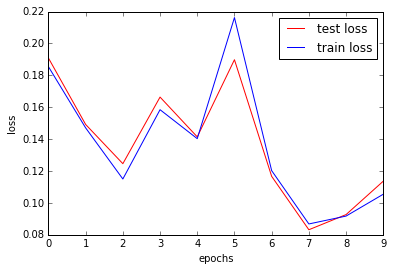

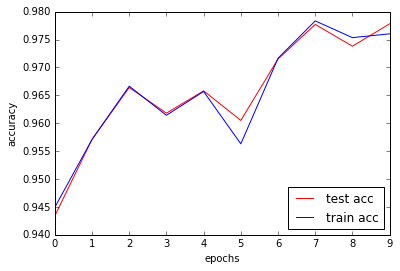

Batch size: 100, eta: 0.6259
Random accuracy = 0.1019
Epoch 0: train loss = 0.1297 [11.912 secs]
test accuracy=0.9640
Epoch 1: train loss = 0.0808 [12.325 secs]
test accuracy=0.9772
Epoch 2: train loss = 0.0643 [12.303 secs]
test accuracy=0.9809
Epoch 3: train loss = 0.0483 [12.566 secs]
test accuracy=0.9847
Epoch 4: train loss = 0.0360 [12.115 secs]
test accuracy=0.9903
Epoch 5: train loss = 0.0329 [11.967 secs]
test accuracy=0.9914
Epoch 6: train loss = 0.0295 [12.030 secs]
test accuracy=0.9916
Epoch 7: train loss = 0.0197 [12.592 secs]
test accuracy=0.9947
Epoch 8: train loss = 0.0164 [12.465 secs]
test accuracy=0.9958
Epoch 9: train loss = 0.0120 [12.550 secs]
test accuracy=0.9974


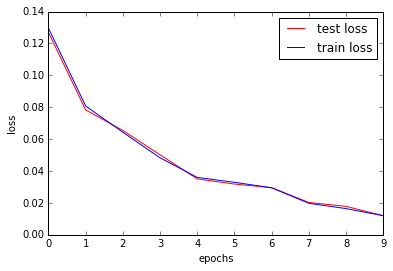

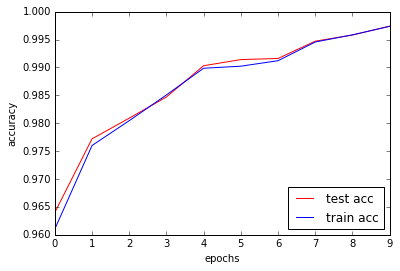

Batch size: 100, eta: 0.37
Random accuracy = 0.1153
Epoch 0: train loss = 0.1546 [14.107 secs]
test accuracy=0.9609
Epoch 1: train loss = 0.1027 [14.459 secs]
test accuracy=0.9736
Epoch 2: train loss = 0.0744 [14.284 secs]
test accuracy=0.9791
Epoch 3: train loss = 0.0610 [14.344 secs]
test accuracy=0.9837
Epoch 4: train loss = 0.0512 [14.798 secs]
test accuracy=0.9862
Epoch 5: train loss = 0.0416 [14.902 secs]
test accuracy=0.9901
Epoch 6: train loss = 0.0368 [14.068 secs]
test accuracy=0.9888
Epoch 7: train loss = 0.0348 [14.008 secs]
test accuracy=0.9904
Epoch 8: train loss = 0.0257 [14.089 secs]
test accuracy=0.9941
Epoch 9: train loss = 0.0206 [14.147 secs]
test accuracy=0.9954


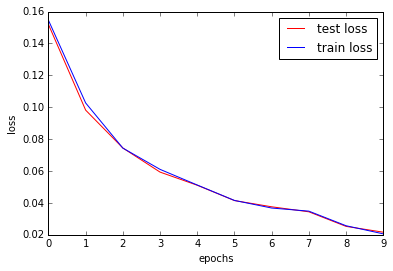

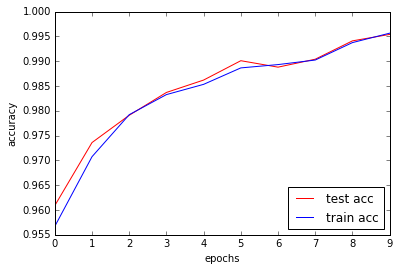

In [17]:
################### please modify this cell to finish the problem 2.b #########################################


# Optimization functions with Momentum algorithm, eta is learning rate and mom is momentum rate
# please implement this function
def Momentum(eta, mom = 0.55):
    
    # Initialize the "grad_hist" variable to memorize the history of gradient, 
    #Just added self.grad_hist = DT(0) in edf.py, removes the need to reload!!
    if 'grad_hist' not in edf.params[0].__dict__.keys():
        for p in edf.params:
            p.grad_hist = edf.DT(0)
    
    # please add code here to finish the function
    for p in edf.params:
        p.grad_hist = mom*p.grad_hist + (1.0 - mom)*p.grad
        p.value -= eta*p.grad_hist
        p.grad = edf.DT(0)
    


# for repeatability
np.random.seed(0)

# Set the loops
B = [50,10,10,100,100]
etas = [0.37,etastar(10),0.37,etastar(100),0.37]

for i in range(5):

    # Inputs and parameters
    inp = edf.Value()
    lab = edf.Value()

    W1 = edf.Param(edf.xavier((28*28,128)))
    B1 = edf.Param(np.zeros((128)))
    W2 = edf.Param(edf.xavier((128,10)))
    B2 = edf.Param(np.zeros((10)))

    # models
    hidden = edf.RELU(edf.Add(edf.VDot(inp,W1),B1))
    pred = edf.SoftMax(edf.Add(edf.VDot(hidden,W2),B2))
    loss = edf.LogLoss(edf.Aref(pred,lab))
    acc = edf.Accuracy(pred,lab)

    # batch size, please also try 10 and 100
    batch = B[i]
    # learning rate eta, measured by per-batch. If you change this batch size, you might also change eta 
    # accoridng to the equation given in the homework.
    eta = etas[i]

    print("Batch size: " + str(B[i])+", eta: "+str(etas[i]))

    # evaluate the random performance
    def eval(imgs, labels):

        batches = range(0, len(labels), batch)
        objective = 0
        accuracy = 0
        for k in batches:
            inp.set(t_imgs[k:k+batch])
            lab.set(t_labels[k:k+batch])
            edf.Forward()
            objective += np.mean(loss.value)
            accuracy += acc.value

        return accuracy/len(batches), objective/len(batches)

    t_imgs = np.float32(tdata['imgs'])/255.
    t_labels = np.float32(tdata['labels'])

    v_imgs = np.float32(vdata['imgs'])/255.
    v_labels = np.float32(vdata['labels'])


    accuracy, objective = eval(t_imgs, t_labels)
    print("Random accuracy = %.4f" % accuracy)

    # train loop
    train_loss = []
    train_acc = []
    test_loss = []
    test_acc = []
    ep = 0
    stime = time()
    epoch = 10
    batches = range(0, len(t_labels), batch)

    while ep < epoch:

        # randon shuffle the train data in each epoch
        perm = np.random.permutation(len(t_labels))
        for k in batches:    
            inp.set(t_imgs[perm[k:k+batch]])
            lab.set(t_labels[perm[k:k+batch]])
            edf.Forward()
            edf.Backward(loss)

            # here, we use Momentum to optimize as in problem 2.b
            Momentum(eta)

        # evaluate on trainset
        t_acc, t_loss = eval(t_imgs, t_labels)
        print("Epoch %d: train loss = %.4f [%.3f secs]" % (ep, t_loss,time()-stime))
        train_loss.append(t_loss)
        train_acc.append(t_acc)

        # evaluate on testset
        v_acc, v_loss = eval(v_imgs, v_labels)
        print("test accuracy=%.4f" % v_acc)
        test_loss.append(v_loss)
        test_acc.append(v_acc)
        stime = time()
        ep += 1

    # plot
    plt.figure(1)
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.plot(np.arange(len(test_loss)), test_loss, color='red')
    plt.plot(np.arange(len(train_loss)), train_loss, color='blue')
    plt.legend(['test loss', 'train loss'], loc='upper right')
    plt.show()

    plt.figure(2)
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.plot(np.arange(len(test_acc)), test_acc, color='red')
    plt.plot(np.arange(len(train_acc)), train_acc, color='blue')
    plt.legend(['test acc', 'train acc'], loc='lower right')
    plt.show()

The four training losses are as follows: 


B = 10 and $\eta$ = 0.1219, train loss = 0.0155

B = 10 and $\eta$ = 0.37, train loss = 0.1054

B = 100 and $\eta$ = 0.6259, train loss = 0.0120

B = 100 and $\eta$ = 0.37, train loss = 0.0206

It's clear, that using the eta forumla out performs a value of 0.37 for the batches, and that the larger batch of 100 slightly ourperforms the batch of 10.

There is a noticeable speed increase with a batch of 100, an order of magnitude greater than batch 10.

# C

Batch size: 50, eta: 0.0015
Random accuracy = 0.1329
Epoch 0: train loss = 0.0900 [2.052 secs]
test accuracy=0.9752
Epoch 1: train loss = 0.0601 [2.814 secs]
test accuracy=0.9833
Epoch 2: train loss = 0.0477 [2.636 secs]
test accuracy=0.9864
Epoch 3: train loss = 0.0338 [2.641 secs]
test accuracy=0.9903
Epoch 4: train loss = 0.0264 [2.819 secs]
test accuracy=0.9929
Epoch 5: train loss = 0.0215 [2.691 secs]
test accuracy=0.9946
Epoch 6: train loss = 0.0168 [2.715 secs]
test accuracy=0.9944
Epoch 7: train loss = 0.0145 [2.679 secs]
test accuracy=0.9963
Epoch 8: train loss = 0.0156 [2.945 secs]
test accuracy=0.9949
Epoch 9: train loss = 0.0087 [2.751 secs]
test accuracy=0.9978


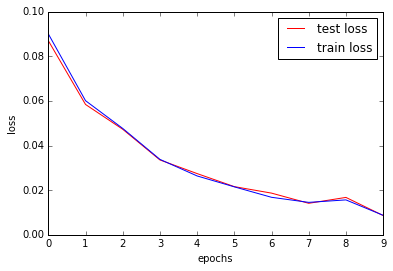

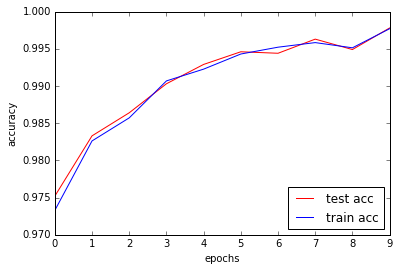

Batch size: 10, eta: 0.0015
Random accuracy = 0.1498
Epoch 0: train loss = 0.0796 [34.136 secs]
test accuracy=0.9767
Epoch 1: train loss = 0.0637 [35.497 secs]
test accuracy=0.9805
Epoch 2: train loss = 0.0403 [34.862 secs]
test accuracy=0.9874
Epoch 3: train loss = 0.0356 [35.287 secs]
test accuracy=0.9877
Epoch 4: train loss = 0.0262 [36.946 secs]
test accuracy=0.9925
Epoch 5: train loss = 0.0296 [38.600 secs]
test accuracy=0.9910
Epoch 6: train loss = 0.0268 [38.881 secs]
test accuracy=0.9915
Epoch 7: train loss = 0.0178 [35.238 secs]
test accuracy=0.9948
Epoch 8: train loss = 0.0177 [37.147 secs]
test accuracy=0.9944
Epoch 9: train loss = 0.0201 [44.583 secs]
test accuracy=0.9927


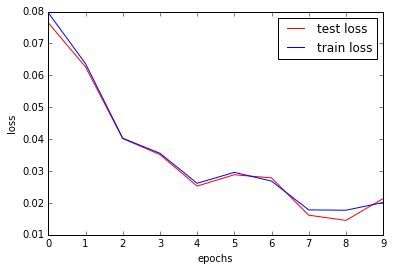

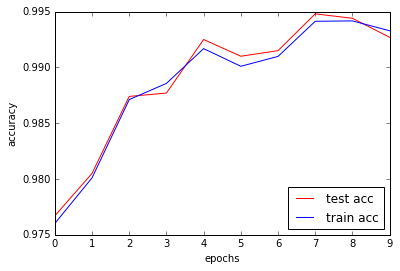

Batch size: 10, eta: 0.001
Random accuracy = 0.1110
Epoch 0: train loss = 0.1052 [65.502 secs]
test accuracy=0.9681
Epoch 1: train loss = 0.0811 [67.813 secs]
test accuracy=0.9776
Epoch 2: train loss = 0.0515 [73.278 secs]
test accuracy=0.9832
Epoch 3: train loss = 0.0359 [73.732 secs]
test accuracy=0.9866
Epoch 4: train loss = 0.0246 [72.894 secs]
test accuracy=0.9927
Epoch 5: train loss = 0.0260 [74.851 secs]
test accuracy=0.9912
Epoch 6: train loss = 0.0197 [74.705 secs]
test accuracy=0.9926
Epoch 7: train loss = 0.0122 [74.070 secs]
test accuracy=0.9961
Epoch 8: train loss = 0.0132 [74.019 secs]
test accuracy=0.9956
Epoch 9: train loss = 0.0145 [74.897 secs]
test accuracy=0.9951


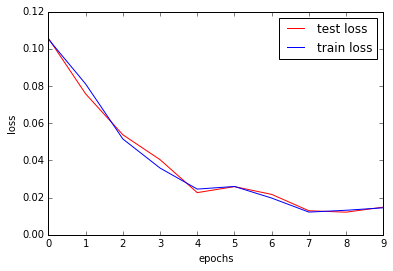

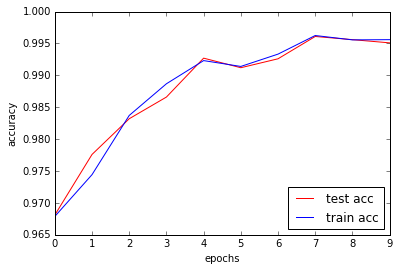

Batch size: 100, eta: 0.0015
Random accuracy = 0.1019
Epoch 0: train loss = 0.1020 [9.084 secs]
test accuracy=0.9726
Epoch 1: train loss = 0.0644 [9.655 secs]
test accuracy=0.9832
Epoch 2: train loss = 0.0514 [9.786 secs]
test accuracy=0.9864
Epoch 3: train loss = 0.0392 [10.521 secs]
test accuracy=0.9914
Epoch 4: train loss = 0.0297 [10.125 secs]
test accuracy=0.9920
Epoch 5: train loss = 0.0268 [10.000 secs]
test accuracy=0.9922
Epoch 6: train loss = 0.0208 [9.863 secs]
test accuracy=0.9929
Epoch 7: train loss = 0.0132 [10.005 secs]
test accuracy=0.9966
Epoch 8: train loss = 0.0122 [9.996 secs]
test accuracy=0.9966
Epoch 9: train loss = 0.0121 [9.899 secs]
test accuracy=0.9971


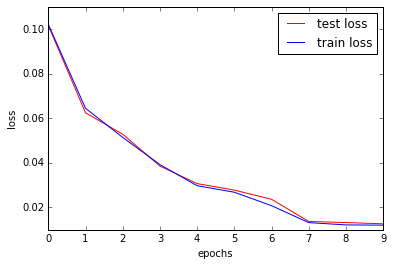

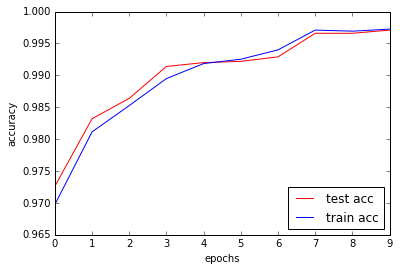

Batch size: 100, eta: 0.001
Random accuracy = 0.1153
Epoch 0: train loss = 0.1196 [11.059 secs]
test accuracy=0.9692
Epoch 1: train loss = 0.0870 [12.075 secs]
test accuracy=0.9769
Epoch 2: train loss = 0.0627 [12.328 secs]
test accuracy=0.9842
Epoch 3: train loss = 0.0490 [12.329 secs]
test accuracy=0.9881
Epoch 4: train loss = 0.0392 [12.443 secs]
test accuracy=0.9896
Epoch 5: train loss = 0.0306 [12.591 secs]
test accuracy=0.9924
Epoch 6: train loss = 0.0266 [12.436 secs]
test accuracy=0.9924
Epoch 7: train loss = 0.0220 [12.745 secs]
test accuracy=0.9945
Epoch 8: train loss = 0.0188 [12.848 secs]
test accuracy=0.9950
Epoch 9: train loss = 0.0154 [12.981 secs]
test accuracy=0.9970


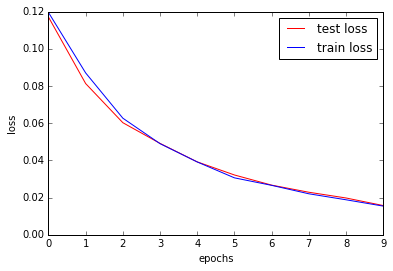

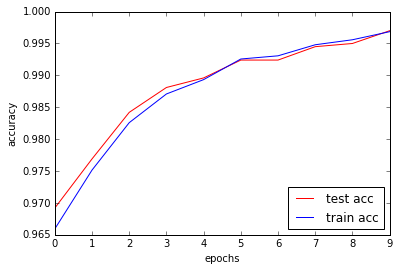

In [26]:
################### please modify this cell to finish the problem 2.c #########################################

# Optimization functions with Adam optimization algorithm.
# For details, please see: https://arxiv.org/abs/1412.6980, 
# Please implement this function

# some constant used in Adam
_a_b1t=edf.DT(1.0)
_a_b2t=edf.DT(1.0)

def Adam(eta=0.001, b1 = 0.9, b2 = 0.999, ep=1e-8):
    
    global _a_b1t
    global _a_b2t

    # Initialize the "grad_hist" variable to memorize the history of gradient
    # Initialize the "grad_h2" variable to memorize the history of gradient variance
    #Just added self.grad_hist = DT(0) and self.grad_h2=DT(0) in edf.py, removes the need to reload!!
    if 'grad_hist' not in edf.params[0].__dict__.keys():
        for p in edf.params:
            p.grad_hist = edf.DT(0)
            p.grad_h2 = edf.DT(0)

    # please finish this function
    for p in edf.params:
        p.grad_hist = b1*p.grad_hist + (1.0 - b1)*p.grad
        p.grad_h2 = b2*p.grad_h2 + (1.0-b2)*p.grad**2
        p.value -= eta/(np.sqrt(p.grad_h2)+ep)*p.grad_hist
        p.grad = edf.DT(0)
    
    
    
# for repeatability
np.random.seed(0)

# Set the loops
B = [50,10,10,100,100]
etas = [0.0015,0.0015,0.001,0.0015,0.001]

for i in range(5):

    # Inputs and parameters
    inp = edf.Value()
    lab = edf.Value()

    W1 = edf.Param(edf.xavier((28*28,128)))
    B1 = edf.Param(np.zeros((128)))
    W2 = edf.Param(edf.xavier((128,10)))
    B2 = edf.Param(np.zeros((10)))

    # models
    hidden = edf.RELU(edf.Add(edf.VDot(inp,W1),B1))
    pred = edf.SoftMax(edf.Add(edf.VDot(hidden,W2),B2))
    loss = edf.LogLoss(edf.Aref(pred,lab))
    acc = edf.Accuracy(pred,lab)


    # batch size, please also try 10 and 100
    batch = B[i]
    # learning rate eta, measured by per-batch. If you change this batch size, you might also change eta 
    # accoridng to the equation given in the homework.
    eta = etas[i]

    print("Batch size: " + str(B[i])+", eta: "+str(etas[i]))

    # evaluate the random performance
    def eval(imgs, labels):

        batches = range(0, len(labels), batch)
        objective = 0
        accuracy = 0
        for k in batches:
            inp.set(t_imgs[k:k+batch])
            lab.set(t_labels[k:k+batch])
            edf.Forward()
            objective += np.mean(loss.value)
            accuracy += acc.value

        return accuracy/len(batches), objective/len(batches)

    t_imgs = np.float32(tdata['imgs'])/255.
    t_labels = np.float32(tdata['labels'])

    v_imgs = np.float32(vdata['imgs'])/255.
    v_labels = np.float32(vdata['labels'])


    accuracy, objective = eval(t_imgs, t_labels)
    print("Random accuracy = %.4f" % accuracy)

    # train loop
    train_loss = []
    train_acc = []
    test_loss = []
    test_acc = []
    ep = 0
    stime = time()
    epoch = 10
    batches = range(0, len(t_labels), batch)

    while ep < epoch:

        # randon shuffle the train data in each epoch
        perm = np.random.permutation(len(t_labels))
        for k in batches:    
            inp.set(t_imgs[perm[k:k+batch]])
            lab.set(t_labels[perm[k:k+batch]])
            edf.Forward()
            edf.Backward(loss)

            # here, we use Adam algorithm to optimize as in problem 2.c
            Adam(eta)

        # evaluate on trainset
        t_acc, t_loss = eval(t_imgs, t_labels)
        print("Epoch %d: train loss = %.4f [%.3f secs]" % (ep, t_loss,time()-stime))
        train_loss.append(t_loss)
        train_acc.append(t_acc)

        # evaluate on testset
        v_acc, v_loss = eval(v_imgs, v_labels)
        print("test accuracy=%.4f" % v_acc)
        test_loss.append(v_loss)
        test_acc.append(v_acc)
        stime = time()
        ep += 1

    # plot
    plt.figure(1)
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.plot(np.arange(len(test_loss)), test_loss, color='red')
    plt.plot(np.arange(len(train_loss)), train_loss, color='blue')
    plt.legend(['test loss', 'train loss'], loc='upper right')
    plt.show()

    plt.figure(2)
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.plot(np.arange(len(test_acc)), test_acc, color='red')
    plt.plot(np.arange(len(train_acc)), train_acc, color='blue')
    plt.legend(['test acc', 'train acc'], loc='lower right')
    plt.show()

The training losses are as follows: 


B = 50 and $\eta$ = 0.0015, train loss = 0.0087

B = 10 and $\eta$ = 0.0015, train loss = 0.0201

B = 10 and $\eta$ = 0.001, train loss = 0.0145

B = 100 and $\eta$ = 0.0015, train loss = 0.0121

B = 100 and $\eta$ = 0.001, train loss = 0.0154


Batch 50 with the optimized learning rate ran the fastest, with the lowest training loss, which is to be expected. With a batch of 10, tweaking the learning rate a bit lower than 0.0015 increased the performance, which is consistent with the idea that learning rate should correlate with batch size. Similarly, with a batch of 100, tweaking the learning rate lower than 0.0015 weakened performance.

# D

The larger batches run much quicker in all cases, which is to be expected. If I had to run these models on a larger data set, I would stick with AdaM, the accuracy was comperable to SGD while running an order of magnitude faster. I was expecting B = 100 and $\eta$ = 0.6259 to have the best results, but it seems that a B=50 and $\eta$ = 0.37 models are superior for MNIST data.

The AdaM accuracy is similar to SGD as they optimize the same loss mechanism, AdaM just smooths out the gradient descent. With more epochs I feel the values would converge to the same accuracy, given the same random kernel. Also, AdaM has a built in mechanism to not overshoot the global loss minimum with a learning rate that is too large, as the variance kicks in the normalize.

In [5]:
a = np.ndarray((100,3,3,3))
b = np.ndarray((3,3,3,32))
np.tensordot(a,b,axes=[[1,2,3],[0,1,2]]).shape

(100L, 32L)

In [2]:
import numpy as np